<a href="https://colab.research.google.com/github/ANCAMABEBA/Module11/blob/main/VehiclesPricesDataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What Drives the Price of a Car?**

## **Overview**
The goal is to **understand what factors make a car more or less expensive**.  
As a result of our analysis, we provide **clear recommendations** to our client — **a used car dealership** — regarding **what consumers value in a used car**.

---

## **Project Framework**

To frame the task, we reference a standard industry methodology for data and analytics projects called **CRISP-DM** (Cross-Industry Standard Process for Data Mining).  
CRISP-DM provides a structured, end-to-end framework that guides each stage of a data science initiative — from defining the problem to deploying a solution.

---

### **Phases of the CRISP-DM Model**

#### **Business Understanding**
In this project, it is essential to clarify the real objective: the goal is **not only to predict prices**, but to **understand the key factors that make a car more or less expensive**.  
This business-first perspective ensures that the analytical work leads to actionable insights to support decision-making for used-car inventory acquisition, pricing strategy, and margin optimization.

---

#### **Data Understanding**
We conducted an in-depth review of the dataset and identified several data quality issues, including missing values, outliers, inconsistent formatting, and very high cardinality fields.  
Exploratory Data Analysis (EDA) enabled us to uncover initial patterns and determine which vehicle characteristics most strongly correlate with price.

---

#### **Data Preparation**
Significant preprocessing work was performed to prepare the dataset for modeling:
- Handling missing values
- Standardizing numeric features
- Encoding categorical variables
- Creating engineered features
- Removing high-cardinality variables to avoid noise and leakage

These steps ensured that the dataset was clean, structured, and modeling-ready.

---

#### **Modeling**
Multiple modeling techniques were applied to identify the strongest price drivers, including:
- Linear Regression (baseline and standardized versions)
- Sequential Feature Selection (SFS)
- Ridge and Lasso Regularization
- **Random Forest**
- **XGBoost**
- RandomizedSearchCV hyperparameter tuning

This multi-model approach ensures strong insight validation and robust result comparison.

---

#### **Evaluation**
The **untuned Random Forest model** emerged as the best performer, producing strong predictive accuracy and capturing nonlinear interactions among vehicle characteristics.  
Additionally, the model provides **high interpretability** through feature importance analysis and SHAP explainability, supporting the business objective of understanding pricing drivers.

---

#### **Deployment**
Given the strong performance and interpretability of the Random Forest model, next steps include:
- Additional tuning with expanded compute capacity
- Retraining with more enriched data sources
- Deployment via an API to integrate with dealership appraisal tools, inventory management systems, and pricing dashboards

This would enable real-time price recommendations and decision support for dealership users.

---

## **Data**
**Dataset:** Used car dataset (subset of the full 3M-row dataset)  
**Size:** ~426,000 records  
**Source:** Kaggle

---





## **Importing Required Libraries**

In this section, we import the core libraries required for data manipulation, visualization, and machine learning model development.  
These libraries support the full lifecycle of the analysis, including data loading, cleaning, exploratory analysis, feature engineering, and model evaluation.

---

### **📚 Key Python Libraries Used**

#### **Data Manipulation**
- **Pandas** — structured data handling, preprocessing, feature engineering
- **NumPy** — optimized numerical computation and matrix operations

#### **Visualization**
- **Matplotlib / Seaborn** — graphical representation of distributions, relationships, and model insights

#### **Machine Learning & Modeling**
- **Scikit-Learn** — regression models, evaluation metrics, feature scaling, train-test splitting
  - `train_test_split` — create training and testing datasets
  - `StandardScaler` — standardization of numeric input features
  - `LinearRegression` — baseline linear regression modeling
  - `mean_squared_error`, `r2_score` — performance evaluation

---


In [78]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
sns.set_palette("bright")

---

## **Loading the Dataset**

In this section, we will load the used car dataset into a Pandas DataFrame.  
This will allow us to begin exploring the structure of the data, inspecting columns, identifying missing values, and preparing for further analysis.

Make sure that the dataset file is available in your environment.  
If you are working in **Google Colab**, you may need to either:
- Upload the file manually using `files.upload()`, or
- Mount Google Drive and access it from there.

---


In [ ]:
# Load the dataset
df_cars = pd.read_csv('sample_data/vehicles.csv')
print("Number of records:", df_cars.shape[0])

Number of records: 426880


---

## **Overview of the Data**

In this section, we will perform an initial inspection of the dataset to understand its structure and content.  
The goal is to get familiar with the variables available, the size of the dataset, and any immediate issues such as missing values, data types, or outliers.

### **Key Questions to Consider**
- How many records and features are included in the dataset?
- What types of data are present (numeric, categorical, text)?
- Are there missing values or inconsistencies that may require cleaning?
- Are there features that may be particularly important to the price of a car?

### **Initial Actions**
- Review dataset dimensions
- Display a sample of rows
- Review the list of columns and their data types
- Assess missing data patterns

---


In [ ]:
# Check data types and non-null counts
print("Dataset info:")
print(df_cars.info(), "\n")

# Check for missing values in each column
print("Missing values per column:")
print(df_cars.isnull().sum(), "\n")

# Calculate % of missing values for each column
missing_percent = df_cars.isnull().sum() / len(df_cars) * 100

# Print % missing for each column
for col, pct in missing_percent.items():
    print(f"{col}: {pct:.2f}%")

# Check for duplicates
duplicate_count = df_cars.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}\n")

# Basic descriptive statistics for numerical columns
print("Summary statistics:")
print(df_cars.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

---

## **Exploratory Data Analysis (EDA)**

In this section, we will explore the dataset through both descriptive statistics and visual analysis.  
The main objective of EDA is to uncover patterns, detect anomalies, test assumptions, and identify relationships between variables—particularly with respect to **car price**, our target variable.

### **Goals of EDA**
- Understand the overall distribution of the key variables
- Explore relationships between features and the target variable (**price**)
- Identify trends and patterns that may explain variations in car pricing
- Detect potential data quality issues (outliers, duplicates, missing values, unusual values)
- Form early hypotheses that will guide modeling decisions

### **Typical EDA Activities**
- Viewing summary statistics and distributions
- Plotting histograms, boxplots, scatterplots, and correlation heatmaps
- Analyzing categorical vs. numerical relationships
- Examining target variable distribution

---



---

## **Data Cleaning, EDA and Encoding**

In this section, we will clean the dataset to ensure it is ready for analysis and modeling.  
This process includes handling missing values, correcting inconsistent formatting, managing outliers, and preparing features for further exploration.

---


In [ ]:
# Drop 'size' and 'VIN' columns because the % of missing values
df_cars_clean = df_cars.drop(columns=['size', 'VIN'])

# Verify the columns were removed
print(df_cars_clean.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')


In [ ]:
# Inspect values in each column
# Loop through each column and print unique values
for col in df_cars_clean.columns:
    unique_vals = df_cars_clean[col].unique()
    num_unique = len(unique_vals)
    print(f"Column '{col}' has {num_unique} unique values:")
    print(unique_vals)
    print("-" * 50)

Column 'id' has 426880 unique values:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
--------------------------------------------------
Column 'region' has 404 unique values:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 's

In [ ]:
# remove rows without year or price or price = 0
df_cars_clean = df_cars_clean.dropna(subset=['year', 'price'])
df_cars_clean = df_cars_clean[df_cars_clean['price'] > 0]
print("Number of records:", df_cars_clean.shape[0])

Number of records: 392812


In [ ]:
# handle missing values
# Categorical columns, we impute the value 'Unkown'
categorical_cols = ['region', 'manufacturer', 'model', 'condition', 'cylinders',
                    'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
df_cars_clean[categorical_cols] = df_cars_clean[categorical_cols].fillna('Unknown')

# Numerical columns, we imput the median as it is less sensitive to extreme values than the mean
numerical_cols = ['odometer']
for col in numerical_cols:
    df_cars_clean[col] = df_cars_clean[col].fillna(df_cars_clean[col].median())
# explore missing values after handling
print("Missing values per column:")
print(df_cars_clean.isnull().sum(), "\n")

Missing values per column:
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64 



In [ ]:
#Visualize price distribution
df_cars_clean['price'].describe()




,price
count,3.928120e+05
mean,8.160578e+04
std,1.269956e+07
min,1.000000e+00
25%,7.000000e+03
50%,1.500000e+04
75%,2.759000e+04
max,3.736929e+09


In [ ]:
# Explore price outliers
# Filter cars with price above 350,000
high_price_cars = df_cars_clean[df_cars_clean['price'] > 350000]

# Select only the columns of interest
high_price_cars_selected = high_price_cars[['region', 'price', 'year', 'manufacturer']]

# Display the result
print(high_price_cars_selected)





                            region       price    year manufacturer
280                     birmingham   987654321  1960.0    chevrolet
1838                        dothan    99999999  1993.0         ford
26075              fresno / madera     1111111  2014.0    chevrolet
29386              humboldt county  1111111111  1999.0         ford
37409                      modesto  1111111111  2020.0         jeep
...                            ...         ...     ...          ...
377515  killeen / temple / ft hood     1234567  1955.0    chevrolet
379133          mcallen / edinburg    25003000  1991.0    chevrolet
384872                        waco     1234567  1955.0    chevrolet
384898                        waco     1234567  1955.0    chevrolet
416145                  eau claire      999999  2006.0         ford

[72 rows x 4 columns]


In [ ]:
# Inspect the rows with prices higher than 350000.
# Temporarily display all rows
pd.set_option('display.max_rows', 100)  # set to a number larger than 77

# Display all high-price cars
print(high_price_cars_selected)

# Optional: reset to default later
pd.reset_option('display.max_rows')


                            region       price    year   manufacturer
280                     birmingham   987654321  1960.0      chevrolet
1838                        dothan    99999999  1993.0           ford
26075              fresno / madera     1111111  2014.0      chevrolet
29386              humboldt county  1111111111  1999.0           ford
37409                      modesto  1111111111  2020.0           jeep
37410                      modesto  3009548743  2021.0      chevrolet
68935               ventura county     2000000  2002.0         saturn
79088      fort collins / north CO      655000  2010.0       chrysler
83367                   eastern CT     1000000  2022.0        Unknown
87052                    new haven     1000000  2019.0        Unknown
91576                     delaware  3024942282  2000.0  mercedes-benz
91605                     delaware     1000000  2022.0        Unknown
91807                     delaware     1000000  2022.0        Unknown
95119        ft myer

In [ ]:
# Remove cars with price above 350,000 because after inpecting these 77 car prices do not make much sense (Likely correspond to errors)
df_cars_clean = df_cars_clean[df_cars_clean['price'] <= 350000]

# Check that the removal worked
print("Max price after removal:", df_cars_clean['price'].max())

Max price after removal: 349999


In [ ]:
# Understand region distribution
# Count number of cars per region
region_counts = df_cars_clean['region'].value_counts()

# Display top 20 regions
print(region_counts.tail(50))

# If you want to see all regions
#print(region_counts)





region
statesboro                 138
auburn                     138
owensboro                  137
twin tiers NY/PA           136
butte                      134
central louisiana          127
susanville                 119
kirksville                 117
gulfport / biloxi          116
southeast IA               116
huntington-ashland         115
la salle co                114
show low                   111
elko                       110
north dakota               109
del rio / eagle pass       105
potsdam-canton-massena     102
outer banks                102
roswell / carlsbad          95
bismarck                    89
southwest KS                88
southeast KS                88
farmington                  87
hattiesburg                 86
deep east texas             86
southeast alaska            84
south dakota                81
scottsbluff / panhandle     77
ogden-clearfield            76
north platte                76
eastern montana             75
provo / orem                75
s

In [ ]:
# Compute average price per region
avg_price_region = df_cars_clean.groupby('region')['price'].mean()

# Sort by descending price to see high-value regions first
avg_price_region_sorted = avg_price_region.sort_values(ascending=False)

# Display top 20 regions by average price
print("Top 20 regions by average price:")
print(avg_price_region_sorted.head(20))

# Display bottom 20 regions by average price
print("\nBottom 20 regions by average price:")
print(avg_price_region_sorted.tail(20))


Top 20 regions by average price:
region
logan                33941.920530
salt lake city       33651.367171
olympic peninsula    33256.715084
east oregon          32747.836676
boone                31353.309375
yuma                 31099.253823
pullman / moscow     31066.403292
southwest TX         30607.166667
butte                30557.014925
laredo               30177.895706
san angelo           29742.062500
owensboro            29650.401460
galveston            29416.800000
northwest KS         29256.741007
moses lake           29182.745973
southwest VA         29123.485549
stillwater           29055.769697
wenatchee            28515.891940
bakersfield          28462.404203
central louisiana    28385.748031
Name: price, dtype: float64

Bottom 20 regions by average price:
region
okaloosa / walton          13670.677596
norfolk / hampton roads    13651.127060
new haven                  13571.939661
gulfport / biloxi          13495.586207
potsdam-canton-massena     13302.372549
milwauke

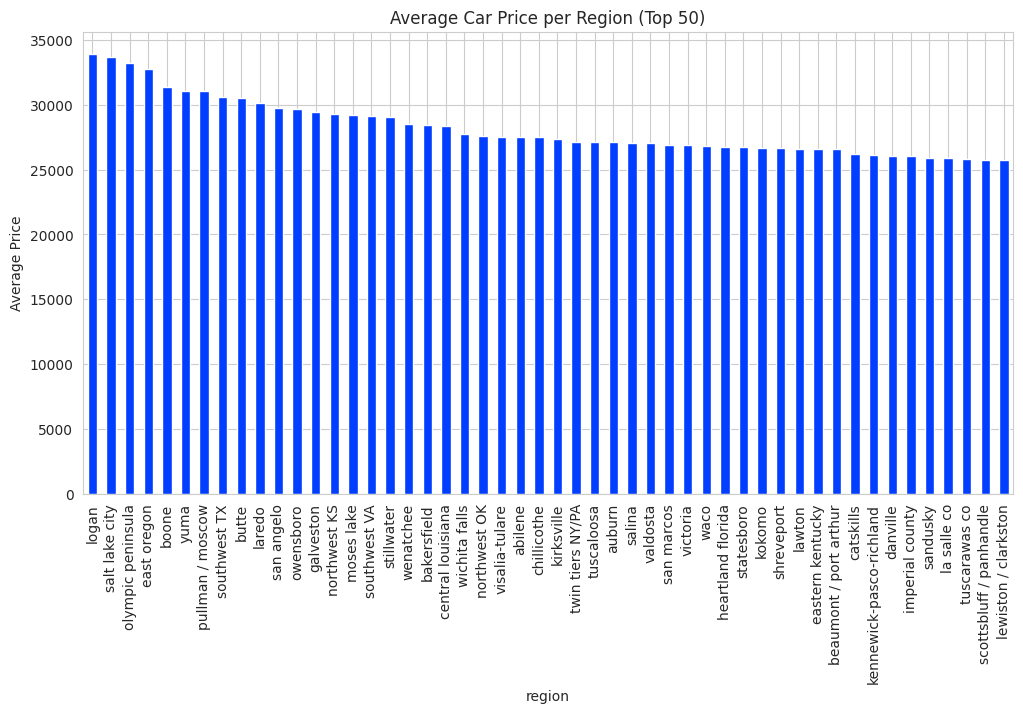

In [ ]:
# Plot average price per region for top 50 regions by average price
top_50_regions = avg_price_region_sorted.head(50)
plt.figure(figsize=(12,6))
top_50_regions.plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Car Price per Region (Top 50)')
# ---- SAVE IMAGE ----
plt.savefig("avg_price_top50_regions.png", dpi=300, bbox_inches='tight')

plt.show()

Bottom 50 regions by average price:
region
siskiyou county             9178.533333
west virginia (old)         9423.750000
show low                   10634.486486
kenosha-racine             10686.843709
high rockies               11162.587879
fort smith, AR             11471.875000
klamath falls              11534.183099
philadelphia               11954.020825
upper peninsula            12527.312500
detroit metro              12612.349702
houma                      12840.686567
chicago                    13172.733732
duluth / superior          13198.755674
battle creek               13237.798061
milwaukee                  13239.964666
potsdam-canton-massena     13302.372549
gulfport / biloxi          13495.586207
new haven                  13571.939661
norfolk / hampton roads    13651.127060
okaloosa / walton          13670.677596
mendocino county           13813.843023
salem                      13819.329545
flint                      13849.688578
hattiesburg                13944.2325

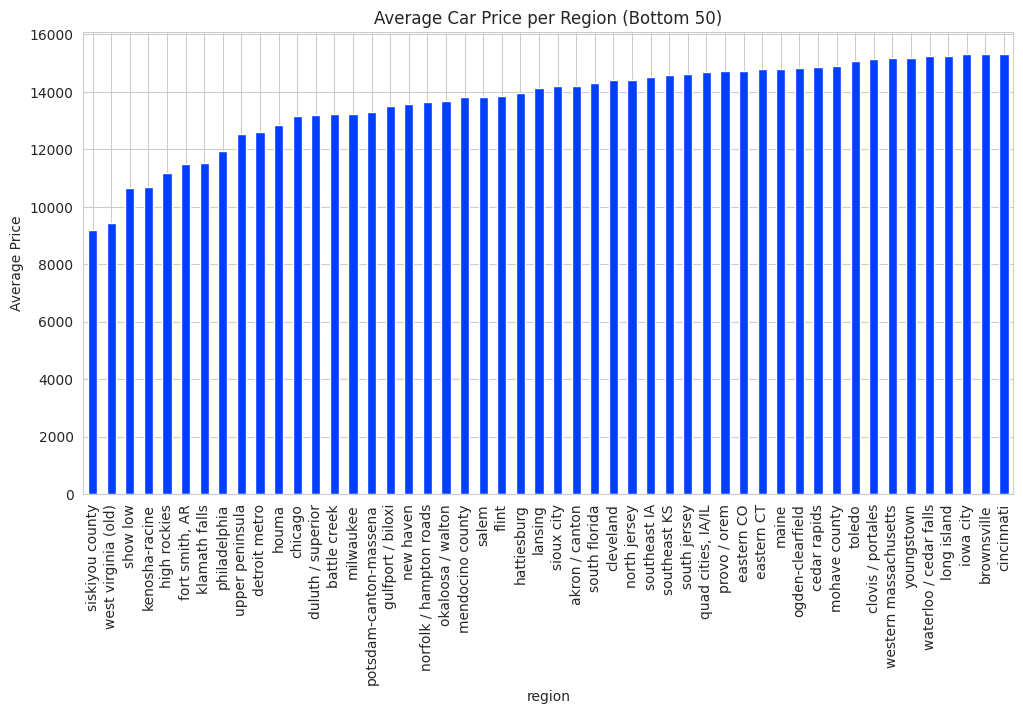

In [ ]:
# Compute average price per region
avg_price_region = df_cars_clean.groupby('region')['price'].mean()

# Sort by ascending price to get lowest average prices
avg_price_region_sorted_asc = avg_price_region.sort_values(ascending=True)

# Display bottom 50 regions by average price
bottom_50_regions = avg_price_region_sorted_asc.head(50)
print("Bottom 50 regions by average price:")
print(bottom_50_regions)

# Plot bottom 50 regions
plt.figure(figsize=(12,6))
bottom_50_regions.plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Car Price per Region (Bottom 50)')
# ---- SAVE IMAGE ----
plt.savefig("avg_price_bottom50_regions.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Based on the fact that we can capture the signal of region from State, we discarded the approach below, as originally we thought
# about creating 4 tiers of region based on price, but it introduces the risk of creating a feature highly correlated with target variable
# Bases on the plots, we will create 4 tiers of regios based on price to reduce cardinality of this variable
# create 4 tiers of regions based on price
# Compute average price per region
#avg_price_region = df_cars_clean.groupby('region')['price'].mean()

# Map each region to its average price
#df_cars_clean['region_avg_price'] = df_cars_clean['region'].map(avg_price_region)

# Create 4 balanced quartiles
#df_cars_clean['region_price_tier'] = pd.qcut(
#    df_cars_clean['region_avg_price'],
#    q=4,  # 4 quartiles
#    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
#)
#
# Check distribution
#print(df_cars_clean['region_price_tier'].value_counts())


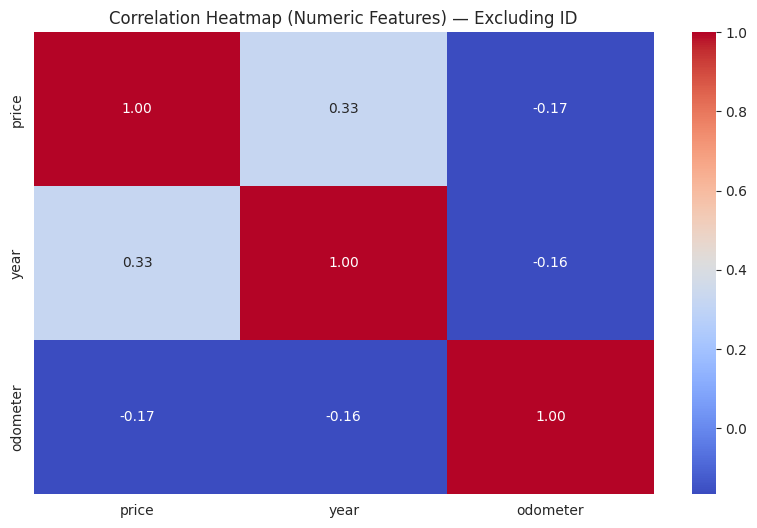

In [ ]:
# Drop id before computing correlations
numeric_cols = df_cars_clean.drop(columns=['id']).select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features) — Excluding ID")

# ---- SAVE IMAGE ----
plt.savefig("correlation_heatmap_numeric.png", dpi=300, bbox_inches='tight')

plt.show()



---

### **Interpretation of Correlation Heatmap**

The heatmap shows the relationships between price and three key variables: **year**, **odometer**. The strongest correlation is between **year and price (+0.33)**, confirming that newer cars tend to be more expensive. **Odometer displays a negative correlation (−0.17)**, meaning cars with higher mileage generally have lower prices, which aligns with typical market behavior.

---


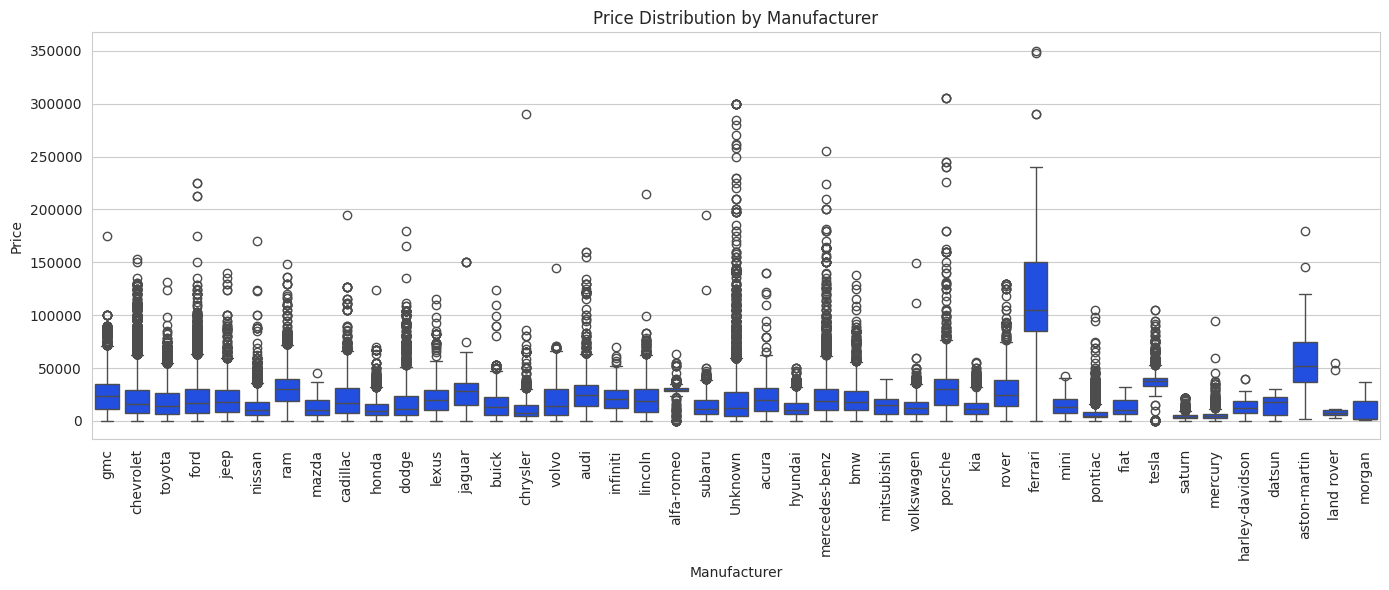

In [ ]:
# let's explore manufacturer
plt.figure(figsize=(14,6))
sns.boxplot(data=df_cars_clean, x="manufacturer", y="price")
plt.xticks(rotation=90)
plt.title("Price Distribution by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.tight_layout()
# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_manufacturer.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# let's explore the 'Unknown" manufacturer category, as it has significant amount of outliers
df_cars_clean.sort_values(by="price", ascending=False).head(50)[["manufacturer","model","year","odometer","price"]]


,manufacturer,model,year,odometer,price
45428,ferrari,f8 tributo,2020.0,2800.0,349999
44387,ferrari,f8 tributo,2020.0,3000.0,347999
399462,porsche,911,2021.0,22.0,304995
88588,porsche,911,2021.0,22.0,304995
90274,porsche,911,2021.0,22.0,304995
304898,Unknown,Lamborghini Huracan,2017.0,13004.0,299991
371065,Unknown,Lamborghini Huracan,2017.0,13004.0,299991
376017,Unknown,Lamborghini Huracan,2017.0,13004.0,299991
176115,Unknown,Lamborghini Huracan,2017.0,13004.0,299991
314352,Unknown,Lamborghini Aventador,2018.0,3171.0,299500


In [ ]:
# Based on the previous data, we could infer the manufacturer from the model in a significant amount of cases, improving the quality of the file
# Filter rows where manufacturer is Unknown
unknown_manuf = df_cars_clean[df_cars_clean['manufacturer'] == 'Unknown']

# Count the frequency of model values within the Unknown group
unknown_model_counts = unknown_manuf['model'].value_counts()

# Display the top 50 most common models for inspection
print(unknown_model_counts.head(50))


model
Scion iM Hatchback 4D               640
smart fortwo Passion Hatchback      168
Genesis G80 3.8 Sedan 4D            163
International 4300                  147
Scion xD Hatchback 4D               134
Genesis G70 2.0T Sedan 4D           131
Scion FR-S Coupe 2D                 112
HUMMER H2                           107
Genesis G70 3.3T Advanced Sedan     102
Scion xB                            100
Scion tC                             92
Genesis G70 3.3T Dynamic Edition     81
hummer h3                            80
scion xb                             80
scion tc                             76
International TerraStar              74
HUMMER H3                            74
Genesis G70 2.0T Advanced Sedan      73
Scion FR-S Release Series 2.0        70
Isuzu NPR                            69
Freightliner M2                      69
Maserati Ghibli                      64
international 4300                   63
Scion FR-S                           62
Hino 268                          

In [ ]:
# Let's apply a dictionary to map model to manufacturer
# ---------------------------------------------
### ---------------------------------------------------------
### 1. Create working copy & normalize model
### ---------------------------------------------------------
df_cars_clean = df_cars_clean.reset_index(drop=True)
print(df_cars_clean.index)
print(df_cars_clean.shape)

df_cars_clean_corrected = df_cars_clean.copy()

df_cars_clean_corrected['model_norm'] = (
    df_cars_clean_corrected['model']
        .astype(str)
        .str.lower()
        .str.strip()
)

### ---------------------------------------------------------
### 2. Remove junk/ad/invalid model strings (safe exact matching)
### ---------------------------------------------------------
junk_exact = [
    'flexible down payments',
    'special finance program 2020',
    'special finance program 2021',
    'super easy finance',
    'many makes and models',
    'special finance',
    'easy car deals',
    'easy car deal',
    'all',
    'classic',
    '1995 ambulance',
    'water truck',
    '#name?'
]

df_cars_clean_corrected = df_cars_clean_corrected[
    ~df_cars_clean_corrected['model_norm'].isin(junk_exact)
]

### ---------------------------------------------------------
### 3. Remove VIN-only rows and raw numeric identifiers
### ---------------------------------------------------------
df_cars_clean_corrected = df_cars_clean_corrected[
    ~df_cars_clean_corrected['model_norm'].str.fullmatch(r'[a-z0-9]{10,}')
]

df_cars_clean_corrected = df_cars_clean_corrected[
    ~df_cars_clean_corrected['model_norm'].str.fullmatch(r'\d{4}')
]


### ---------------------------------------------------------
### 4. Keyword mapping for real vehicles that remain Unknown
### ---------------------------------------------------------
keyword_map3 = {
    'impala': 'chevrolet',
    'f-150': 'ford',
    'f150': 'ford',
    'f-250': 'ford',
    'f250': 'ford',
    'silverado': 'chevrolet',
    'tacoma': 'toyota',
    'wrangler': 'jeep',
    'accord': 'honda',
    'civic': 'honda',
    'prius': 'toyota',
    'gti': 'volkswagen',
    'continental': 'bentley',
    'cougar': 'mercury',
    'humvee': 'am general',
    'mack': 'mack',
    'sterling': 'sterling',
    'acterra': 'sterling',
    'kaiser': 'kaiser',
    'journey': 'dodge',
    'tiguan': 'volkswagen',
    'mustang': 'ford'
}

for key, brand in keyword_map3.items():
    mask = (
        df_cars_clean_corrected['manufacturer'].eq('Unknown') &
        df_cars_clean_corrected['model_norm'].str.contains(key, na=False)
    )
    df_cars_clean_corrected.loc[mask, 'manufacturer'] = brand


### ---------------------------------------------------------
### 5. Convert remaining Unknown to 'Other' (tiny number left)
### ---------------------------------------------------------
df_cars_clean_corrected.loc[
    df_cars_clean_corrected['manufacturer'] == 'Unknown', 'manufacturer'
] = 'Other'

### ---------------------------------------------------------
### 6. Check results
### ---------------------------------------------------------
print("Remaining Unknown:",
      df_cars_clean_corrected[df_cars_clean_corrected['manufacturer']=="Unknown"].shape[0])

print("Final manufacturer distribution:")
print(df_cars_clean_corrected['manufacturer'].value_counts().head(20))

# Filter rows where manufacturer is Unknown
unknown_manuf = df_cars_clean_corrected[df_cars_clean_corrected['manufacturer'] == 'Unknown']

# Count the frequency of model values within the Unknown group
unknown_model_counts = unknown_manuf['model'].value_counts()

# Display the top 50 most common models for inspection
print(unknown_model_counts.head(50))





RangeIndex(start=0, stop=392740, step=1)
(392740, 16)
Remaining Unknown: 0
Final manufacturer distribution:
manufacturer
ford             63885
chevrolet        49776
toyota           30638
honda            19919
jeep             17473
nissan           16741
gmc              15294
bmw              13734
Other            13363
dodge            11500
mercedes-benz    10450
hyundai           9373
ram               9105
subaru            8984
volkswagen        8907
lexus             7741
kia               7546
audi              7179
cadillac          6586
acura             5707
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [ ]:
# inspect file
df_cars_clean_corrected.head()
df_cars_clean_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379065 entries, 0 to 392739
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            379065 non-null  int64  
 1   region        379065 non-null  object 
 2   price         379065 non-null  int64  
 3   year          379065 non-null  float64
 4   manufacturer  379065 non-null  object 
 5   model         379065 non-null  object 
 6   condition     379065 non-null  object 
 7   cylinders     379065 non-null  object 
 8   fuel          379065 non-null  object 
 9   odometer      379065 non-null  float64
 10  title_status  379065 non-null  object 
 11  transmission  379065 non-null  object 
 12  drive         379065 non-null  object 
 13  type          379065 non-null  object 
 14  paint_color   379065 non-null  object 
 15  state         379065 non-null  object 
 16  model_norm    379065 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 52.

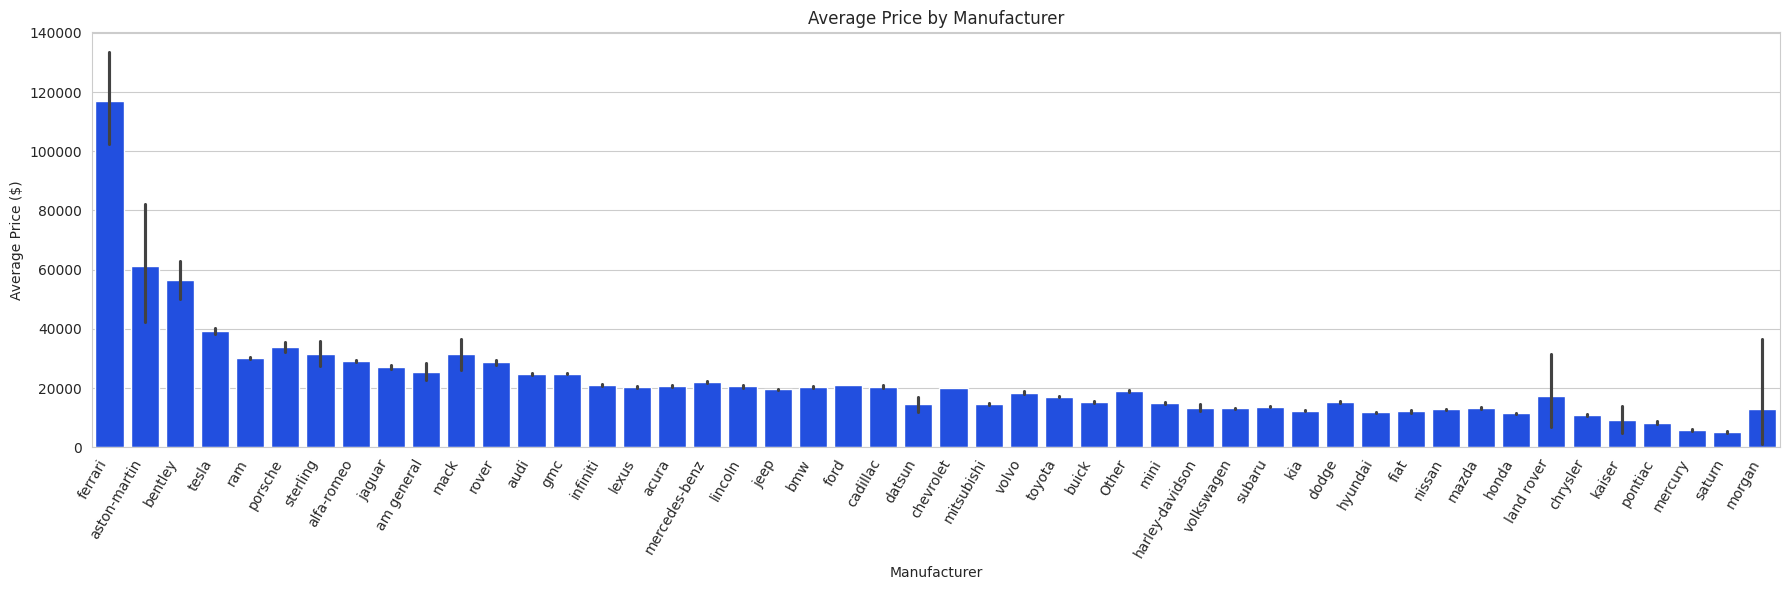

In [ ]:
# Visualization of correlation of manufacturer and price: mean price by manufacturer
# Ensure ordering by median price for better readability
manufacturer_order = (
    df_cars_clean_corrected
    .groupby("manufacturer")["price"]
    .median()
    .sort_values(ascending=False)
    .index
)
# plot
plt.figure(figsize=(18,6))
sns.barplot(
    data=df_cars_clean_corrected,
    x="manufacturer",
    y="price",
    estimator="mean",
    order=manufacturer_order
)
plt.xticks(rotation=60, ha='right')
plt.title("Average Price by Manufacturer")
plt.ylabel("Average Price ($)")
plt.xlabel("Manufacturer")
plt.tight_layout()

# ---- SAVE IMAGE ----
plt.savefig("avg_price_by_manufacturer.png", dpi=300, bbox_inches='tight')

plt.show()


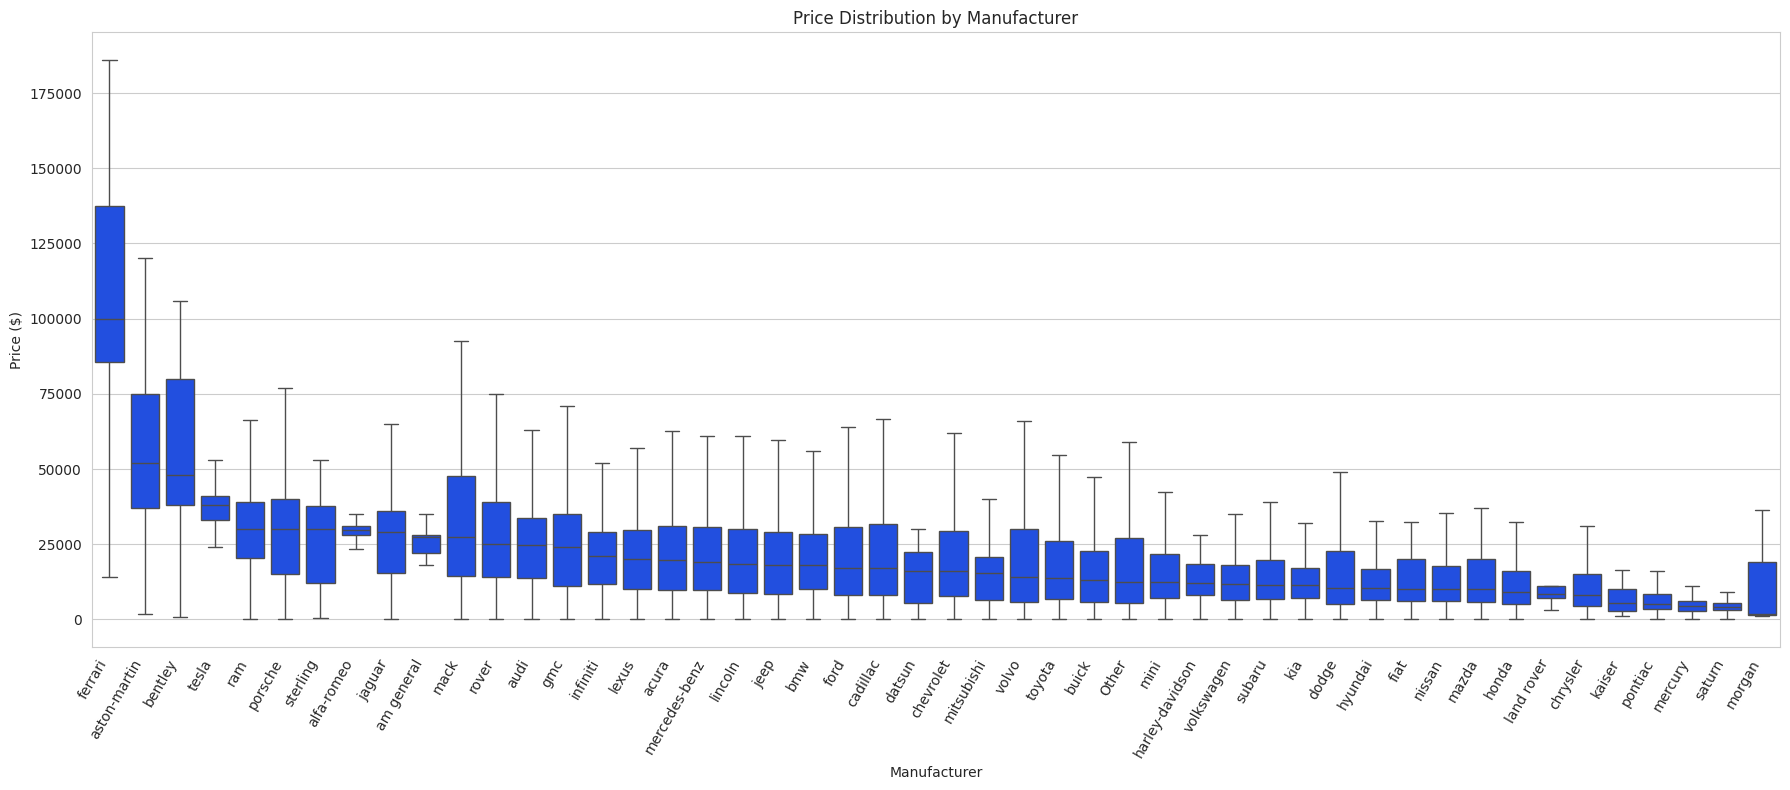

In [ ]:
# Boxplot price distribution by manufacturer
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_cars_clean_corrected, x="manufacturer", y="price",
            order=manufacturer_order, showfliers=False)

plt.xticks(rotation=60, ha='right')
plt.title("Price Distribution by Manufacturer")
plt.ylabel("Price ($)")
plt.xlabel("Manufacturer")
plt.tight_layout()
# Save the figure
plt.savefig("boxplot_price_distribution_by_manufacturer.png", dpi=300, bbox_inches='tight')
plt.show()

---

### **Conclusions from Manufacturer vs. Price Boxplot**

The boxplot demonstrates that **manufacturer has a strong influence on car price**, making it a highly predictive feature for modeling. **Luxury and exotic brands** (e.g., Ferrari, Bentley, Porsche, Tesla) show the highest and most variable prices with many outliers, indicating premium markets with higher risk and margin potential. **Mainstream brands** (Ford, Toyota, Honda, Chevrolet, etc.) display lower, more stable, and predictable price ranges, representing the core volume segment of used-car inventory. **Mid-tier luxury brands** (BMW, Mercedes-Benz, Lexus, Cadillac) occupy a middle range with good premium opportunities and moderate risk. **Commercial/specialty manufacturers** show unusual variability, suggesting they may need to be modeled separately. Overall, price outliers are more common among luxury brands, reflecting customization, collector markets, and price retention.

---


In [ ]:
# Look into Model, to identify data quality issues
# Top 50 most common models
top_50_models = df_cars_clean_corrected['model'].value_counts().head(50)
print(top_50_models)

# Bottom 50 most rare models
bottom_50_models = (
    df_cars_clean_corrected['model']
    .value_counts(ascending=True)   # sort from lowest to highest
    .head(50)
)

print(bottom_50_models)


model
f-150                 7116
Unknown               4617
silverado 1500        4546
camry                 2827
silverado             2780
accord                2749
wrangler              2671
civic                 2597
escape                2517
altima                2491
tacoma                2378
explorer              2252
grand cherokee        2229
mustang               2019
corolla               1973
equinox               1769
cr-v                  1722
fusion                1670
focus                 1669
corvette              1615
malibu                1577
tahoe                 1524
rav4                  1520
impala                1516
charger               1498
sonata                1480
grand caravan         1472
outback               1449
sierra 1500           1436
odyssey               1426
silverado 2500hd      1403
cruze                 1375
prius                 1354
elantra               1329
f-250                 1318
tundra                1280
forester              

In [ ]:
# Our hypothesis is that model has explanatory power combined with manufacturer
# Top manufacturer + model combinations
top_combinations = (
    df_cars_clean_corrected
    .groupby(['manufacturer', 'model'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(50)
)

print(top_combinations)


      manufacturer               model  count
12705         ford               f-150   7116
9370     chevrolet      silverado 1500   4546
25817       toyota               camry   2825
9364     chevrolet           silverado   2780
16555        honda              accord   2749
19025         jeep            wrangler   2671
16795        honda               civic   2597
12279         ford              escape   2516
22470       nissan              altima   2491
26786       toyota              tacoma   2378
12531         ford            explorer   2252
18715         jeep      grand cherokee   2229
14641         ford             mustang   2019
25972       toyota             corolla   1973
8785     chevrolet             equinox   1769
17010        honda                cr-v   1722
14437         ford              fusion   1670
14302         ford               focus   1665
8581     chevrolet            corvette   1605
9161     chevrolet              malibu   1577
10035    chevrolet               t

In [ ]:
# now the bottom 50 combinations
# Bottom 50 least frequent manufacturer + model combinations
bottom_combinations = (
    df_cars_clean_corrected
    .groupby(['manufacturer', 'model'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=True)
    .head(50)
)

print(bottom_combinations)


      manufacturer                            model  count
2            Other                    '99 H1 Hummer      1
19           Other           02 murcury mountaineer      1
20           Other                  03 Monte Carlos      1
21           Other                   03 subura baja      1
22           Other                      04 Colorado      1
23           Other                  04 SUZUKI AERIO      1
25           Other                      04 mb ml350      1
27           Other    05 Saab convertible 2.0 Turbo      1
28           Other              06 Colorado Extreme      1
29           Other              06 benz c280 4matic      1
30           Other                        06 ranger      1
0            Other                                %      1
28304        volvo                      xc90 v8 awd      1
33           Other                          07 525i      1
34           Other     07 Freightliner M2 Dump Plow      1
35           Other                        07 SONATA     

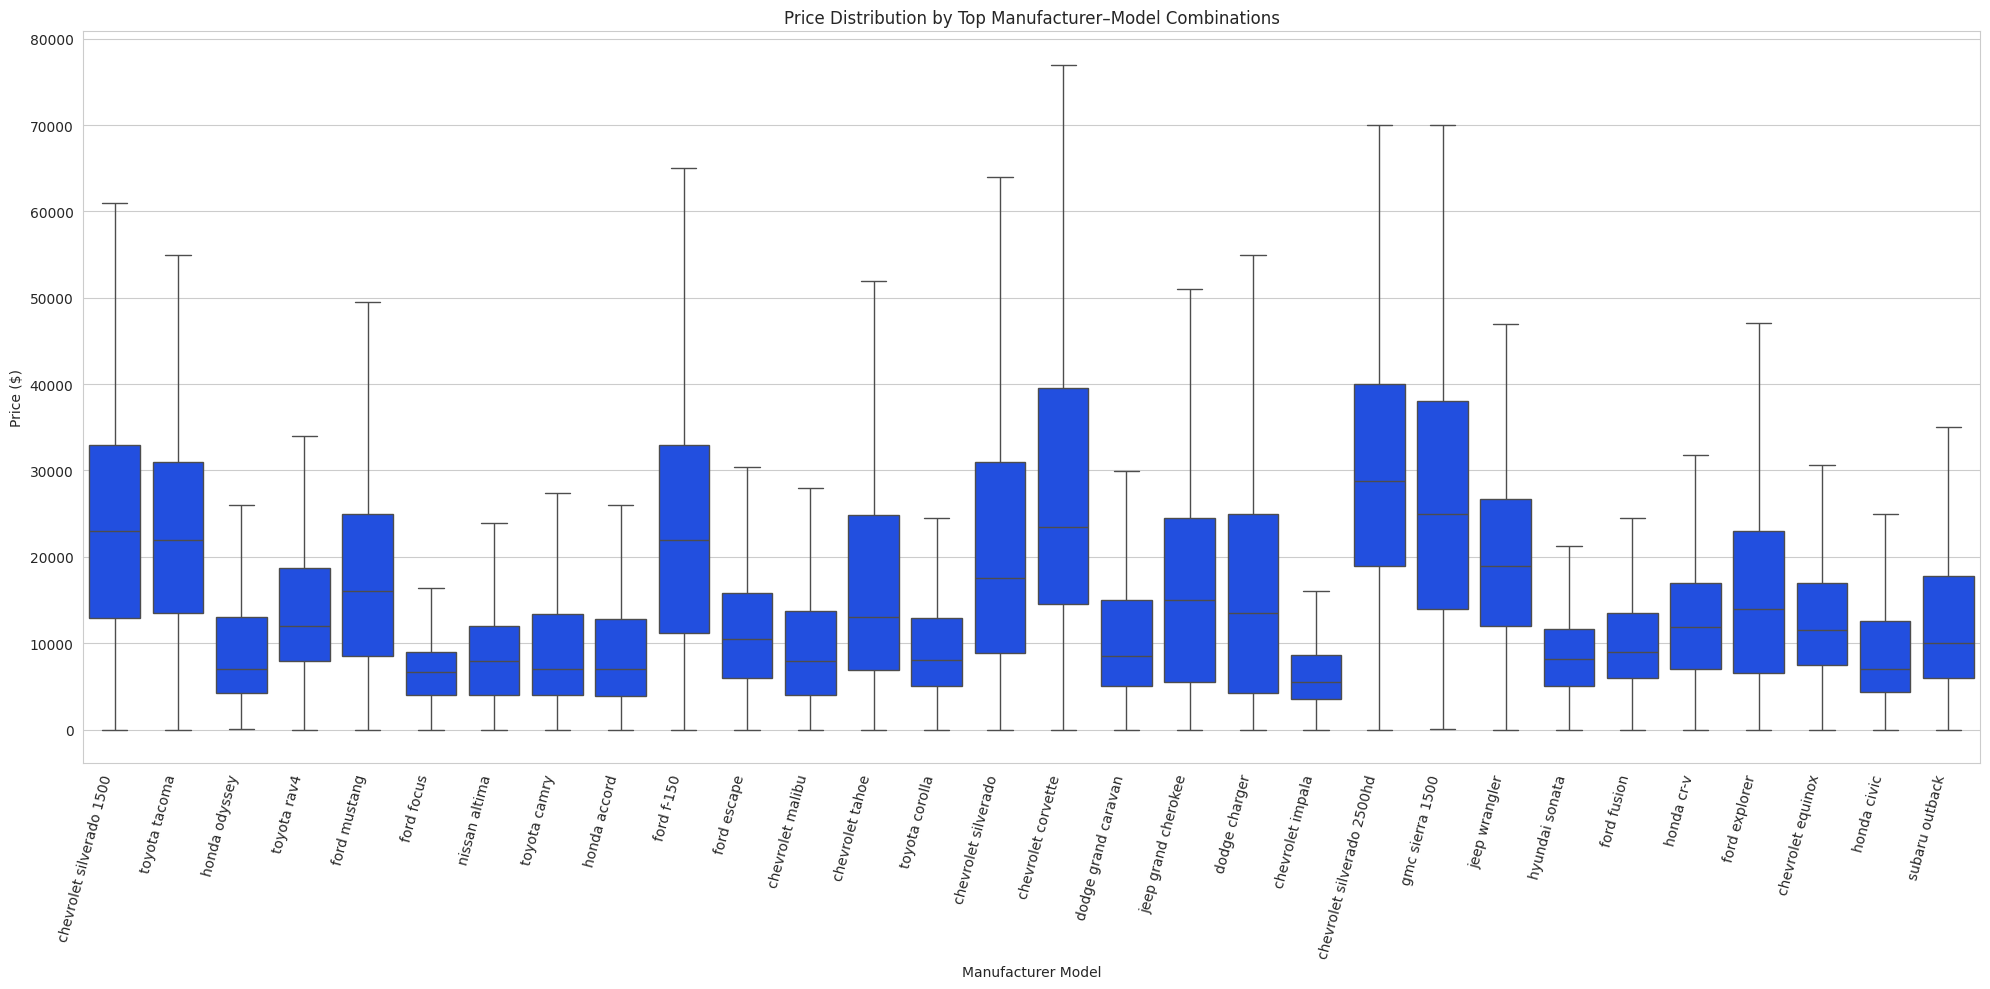

In [ ]:
# visualization manufacturer price
# Get top N most common manufacturer-model combos
top_n = 30  # adjust if needed
top_combos = (
    df_cars_clean_corrected
    .groupby(['manufacturer', 'model'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(top_n)
)

# Filter original dataset to only those top combos
df_top_combos = df_cars_clean_corrected.merge(
    top_combos[['manufacturer', 'model']],
    on=['manufacturer', 'model'],
    how='inner'
)

plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df_top_combos,
    x=df_top_combos['manufacturer'] + " " + df_top_combos['model'],
    y='price',
    showfliers=False
)
plt.xticks(rotation=75, ha='right')
plt.title("Price Distribution by Top Manufacturer–Model Combinations")
plt.xlabel("Manufacturer Model")
plt.ylabel("Price ($)")
plt.tight_layout()
# Save the figure
plt.savefig("boxplot_price_top_manufacturer_model_combos.png", dpi=300, bbox_inches='tight')
plt.show()


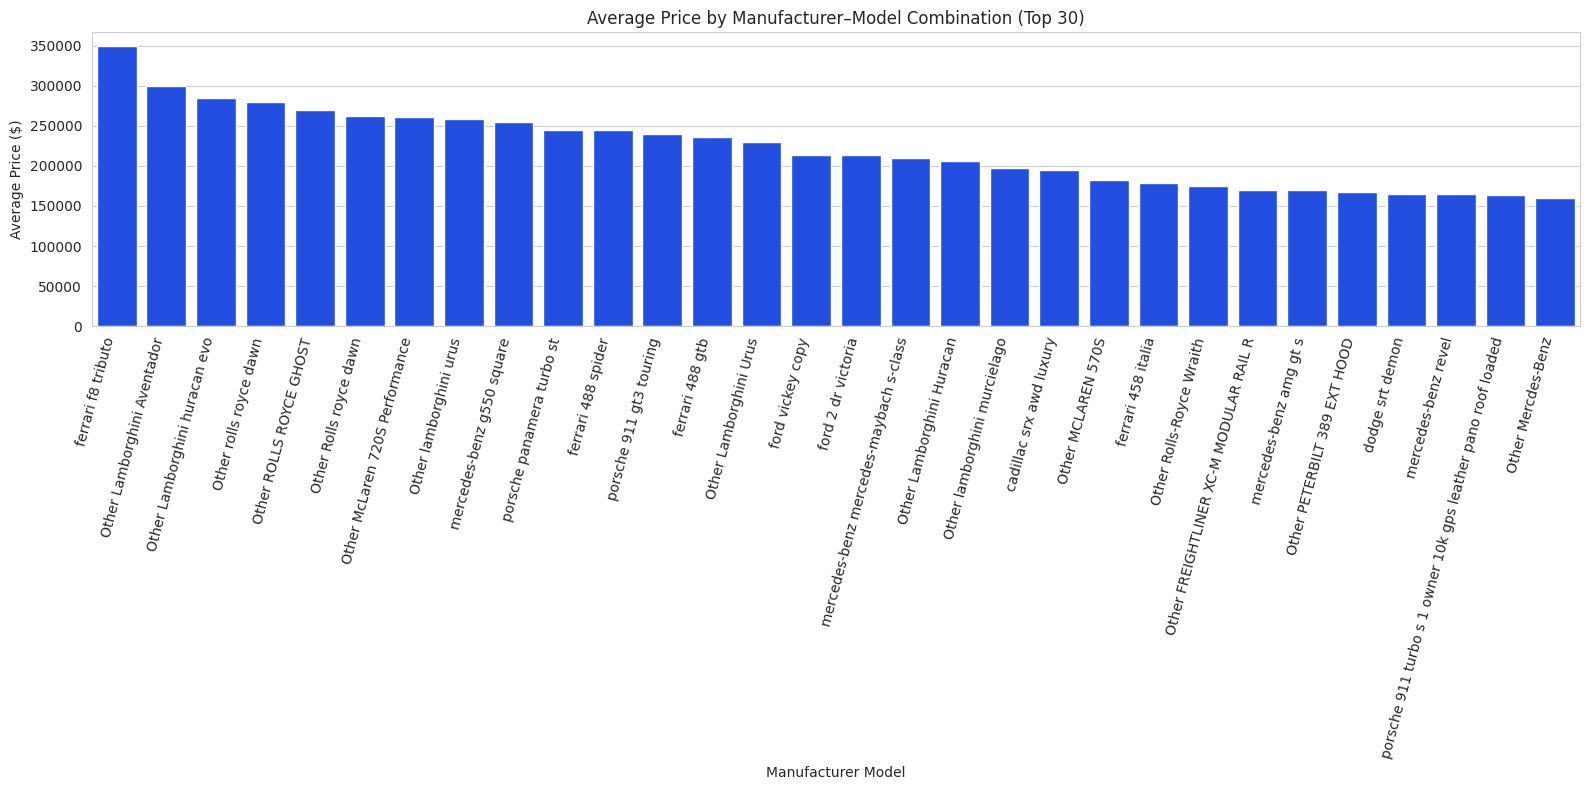

In [ ]:
# additional visualization Manufacturer - Model
avg_prices = (
    df_cars_clean_corrected
    .groupby(['manufacturer', 'model'])['price']
    .mean()
    .reset_index()
    .sort_values(by='price', ascending=False)
    .head(30)
)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=avg_prices,
    x=avg_prices['manufacturer'] + " " + avg_prices['model'],
    y='price'
)
plt.xticks(rotation=75, ha='right')
plt.title("Average Price by Manufacturer–Model Combination (Top 30)")
plt.xlabel("Manufacturer Model")
plt.ylabel("Average Price ($)")
plt.tight_layout()
# Save the figure
plt.savefig("avg_price_top30_manufacturer_model.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# it looks like there are some Manufacturers that have quality issues, for example Other
# Filter rows where manufacturer is 'Other' and show selected columns
df_other = df_cars_clean_corrected[df_cars_clean_corrected["manufacturer"] == "Other"][
    ["year", "model", "price"]
]

print("Number of rows with manufacturer = 'Other':", df_other.shape[0])
df_other.head(50)  # show first 50 rows


Number of rows with manufacturer = 'Other': 13363


,year,model,price
69,2016.0,Scion iM Hatchback 4D,15990
94,2005.0,blue bird bus,6800
104,2016.0,Scion iM Hatchback 4D,14990
106,1966.0,1966 C-30 1 ton,2500
124,2013.0,smart fortwo Passion Hatchback,8990
140,2001.0,F-350,5900
208,2017.0,Maserati Levante,45900
227,1987.0,1987 Saab 900 Turbo,2500
228,2006.0,Suzuki XL-7,2975
331,2016.0,scion ia,9900


In [ ]:
# Apply similar logic to the one we applied to Unknown  Manufacturers to extract Manufacturer from Model in the case of manufacturer = other
# Ensure normalized model column exists
df_cars_clean_corrected['model_norm'] = (
    df_cars_clean_corrected['model']
        .astype(str)
        .str.lower()
        .str.strip()
)

# Keyword to manufacturer mapping for vehicles currently labeled as Other
keyword_map_other = {
    'scion': 'scion',
    'smart': 'smart',
    'blue bird': 'blue bird',
    'fortwo': 'smart',
    'maserati': 'maserati',
    'plymouth': 'plymouth',
    'oldsmobile': 'oldsmobile',
    'hummer': 'hummer',
    'corvette': 'chevrolet',
    'duramax': 'chevrolet',   # could also be GMC
    'isuzu': 'isuzu',
    'freightliner': 'freightliner',
    'saab': 'saab',
    'genesis': 'genesis',
    'forde450': 'ford',       # repair odd token
    'e450': 'ford',
    'f-350': 'ford',
    'f350': 'ford',
    'f-550': 'ford',
    'f550': 'ford',
    'terra star': 'international',
    'terra': 'international',
    'international': 'international'
}

# Apply mapping only to rows in Other
for key, brand in keyword_map_other.items():
    mask = (
        df_cars_clean_corrected['manufacturer'].eq('Other') &
        df_cars_clean_corrected['model_norm'].str.contains(key, na=False)
    )
    df_cars_clean_corrected.loc[mask, 'manufacturer'] = brand

# Display updated counts
print(df_cars_clean_corrected['manufacturer'].value_counts().head(20))

# Check remaining Other
print("Remaining Other:",
      df_cars_clean_corrected[df_cars_clean_corrected['manufacturer']=="Other"].shape[0])

# Preview sample remaining rows
df_cars_clean_corrected[df_cars_clean_corrected["manufacturer"] == "Other"][["year", "model", "price"]].head(50)


manufacturer
ford             63960
chevrolet        49931
toyota           30638
honda            19919
jeep             17473
nissan           16741
gmc              15294
bmw              13734
dodge            11500
mercedes-benz    10450
hyundai           9373
ram               9105
subaru            8984
volkswagen        8907
lexus             7741
kia               7546
audi              7179
cadillac          6586
Other             6087
acura             5707
Name: count, dtype: int64
Remaining Other: 6087


,year,model,price
106,1966.0,1966 C-30 1 ton,2500
228,2006.0,Suzuki XL-7,2975
427,2006.0,Suzuki XL-7,2975
533,2002.0,2002 limited 4 runner,6000
713,2007.0,Hino 268,33990
751,2015.0,Hino 268,49990
753,2007.0,Hino 268,33990
757,2015.0,Hino 268,49990
773,2008.0,Workhorse W42,29990
899,2005.0,Kenworth T300,15900


In [ ]:
# address remaining Other
# Work on remaining 'Other' only
#df = df_cars_clean_corrected

# Expand keyword mapping from remaining samples
keyword_map_other2 = {
    'bmw': 'bmw',
    'chevrolet': 'chevrolet',
    'chevy': 'chevrolet',
    'trailblazer': 'chevrolet',
    'el camino': 'chevrolet',
    'elantra': 'hyundai',
    'hino': 'hino',
    'hino 268': 'hino',
    'workhorse': 'workhorse',
    'willys': 'jeep',
    'venture': 'chevrolet',
    'autocar': 'autocar',
    'kw': 'kenworth',
    'kenworth': 'kenworth',
    'plymouth': 'plymouth',
    'suzuki': 'suzuki',
    'forenza': 'suzuki',
    'reno': 'suzuki',
    'nash': 'nash',
    'volkswagen': 'volkswagen',
    'beetle': 'volkswagen',
    'beetle convertible': 'volkswagen',
    'nova wagon': 'chevrolet',
    't800': 'kenworth',
    '1958i': 'bmw',
    's10': 'chevrolet'
}

for key, brand in keyword_map_other2.items():
    mask = (
        df_cars_clean_corrected['manufacturer'].eq('Other') &
        df_cars_clean_corrected['model_norm'].str.contains(key, na=False)
    )
    df_cars_clean_corrected.loc[mask, 'manufacturer'] = brand

# Display updated counts
print(df_cars_clean_corrected['manufacturer'].value_counts().head(20))

# Check remaining Other count
print("Remaining 'Other':",
      df_cars_clean_corrected[df_cars_clean_corrected['manufacturer'] == "Other"].shape[0])

# Preview sample of remaining 'Other' rows
df_cars_clean_corrected[df_cars_clean_corrected["manufacturer"] == "Other"][["year", "model", "price"]].head(50)


manufacturer
ford             63960
chevrolet        50021
toyota           30638
honda            19919
jeep             17522
nissan           16741
gmc              15294
bmw              13763
dodge            11500
mercedes-benz    10450
hyundai           9414
ram               9105
subaru            8984
volkswagen        8924
lexus             7741
kia               7546
audi              7179
cadillac          6586
acura             5707
chrysler          5649
Name: count, dtype: int64
Remaining 'Other': 5107


,year,model,price
106,1966.0,1966 C-30 1 ton,2500
533,2002.0,2002 limited 4 runner,6000
1421,1999.0,"1999 ply,prowler",1
1651,1990.0,Chevelot,40000
2344,1969.0,1969 nova,19500
2351,1979.0,mg midget,12500
2374,2003.0,YAMAHA XVS650/A/C/AC/AT/ATC/V ST,2900
2435,1980.0,triumph spitfire,5950
2747,1951.0,1951 Suburban,4000
2928,1985.0,merkur xr4ti,1950


In [ ]:
# We create three level Manufacturer category to reduce cardinality
# we will define 2 = ultra-Luxury, 1 = Premium, 0 = Standard
# Define the lists
ultra_luxury = ['ferrari', 'bentley', 'maserati', 'porsche']
premium = [
    'acura', 'alfa-romeo', 'audi', 'bmw', 'cadillac', 'genesis', 'infiniti',
    'jaguar', 'lexus', 'lincoln', 'mercedes-benz', 'tesla', 'volvo', 'mini',
    'rover', 'gmc', 'ram', 'hummer'
]

# Create function to categorize
def manufacturer_category(x):
    x = x.lower()  # normalize text
    if x in ultra_luxury:
        return 2
    elif x in premium:
        return 1
    else:
        return 0

# Apply to DataFrame
df_cars_clean_corrected['manufacturer_category'] = df_cars_clean_corrected['manufacturer'].apply(manufacturer_category)

# convert to a categorical variable
df_cars_clean_corrected['manufacturer_category'] = df_cars_clean_corrected['manufacturer_category'].astype('int')

#
df_cars_clean_corrected[['manufacturer', 'manufacturer_category']].head(10)
df_cars_clean_corrected['manufacturer_category'].value_counts(normalize=True) * 100


,proportion
manufacturer_category,
0,74.094417
1,25.433105
2,0.472478


---

## **Model Feature Consideration**

In the case of the **Model** variable, we explored the possibility of capturing its signal by creating a new feature called **"Exclusive Models"**, based on price thresholds. However, we ultimately decided not to implement this approach because it would create a **strong correlation with the target variable (price)** and introduce a significant **risk of data leakage**. Additionally, due to the **extremely high cardinality** of the Model field and the fact that its explanatory power is **not independent from Manufacturer**, the final decision was **not to include Model in the regression model**.

---


In [ ]:
# let's eplore condition
df_cars_clean_corrected['condition'].unique()
df_cars_clean_corrected['condition'].value_counts(normalize=True) * 100



,proportion
condition,
Unknown,37.575086
good,30.881247
excellent,24.269980
like new,5.153206
fair,1.679132
new,0.288869
salvage,0.152480


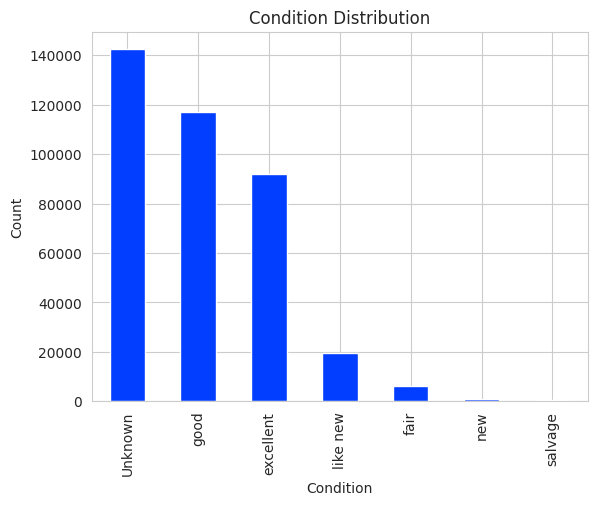

In [ ]:
# plot condition
df_cars_clean_corrected['condition'].value_counts().plot(kind='bar')
plt.title("Condition Distribution")
plt.xlabel("Condition")
plt.ylabel("Count")
# ---- SAVE IMAGE ----
plt.savefig("condition_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



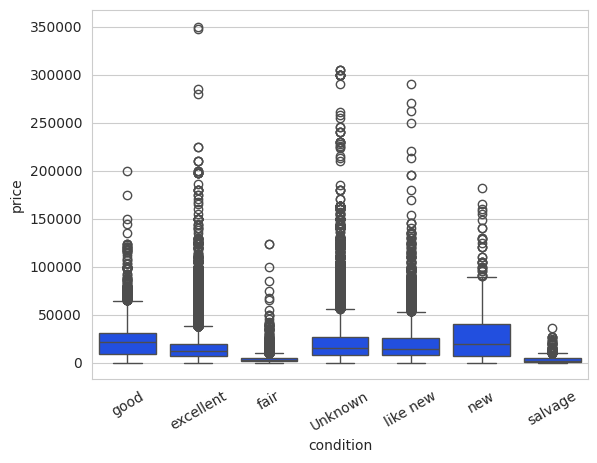

In [ ]:
# compare price metrics between condition values
sns.boxplot(x='condition', y='price', data=df_cars_clean_corrected)
plt.xticks(rotation=30)
# ---- SAVE IMAGE ----
plt.savefig("condition_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# numeric mapping for condition (encoding). We don't use here one-hot encoding becuase the variable has a natural ranking or progression
condition_map = {
    'unknown': 0,
    'salvage': 1,
    'fair': 2,
    'good': 3,
    'excellent': 4,
    'like new': 5,
    'new': 6
}
# Apply mapping to the dataset
df_cars_clean_corrected['condition_numeric'] = \
    df_cars_clean_corrected['condition'].str.lower().map(condition_map)
# check the result
df_cars_clean_corrected[['condition', 'condition_numeric']].head()



,condition,condition_numeric
0,good,3
1,good,3
2,good,3
3,good,3
4,excellent,4


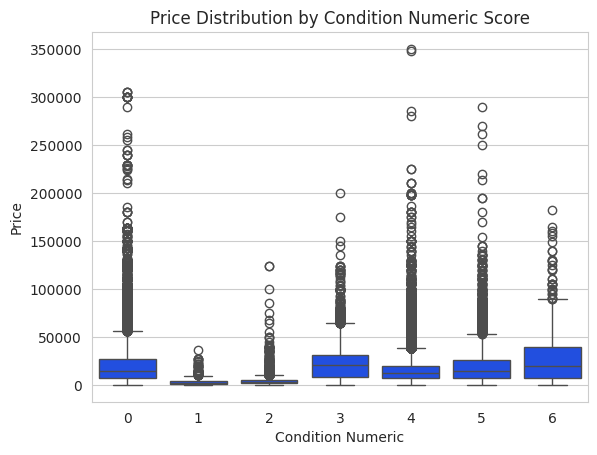

In [ ]:
# Visualization of the new condition variable and price
#import seaborn as sns
#import matplotlib.pyplot as plt

sns.boxplot(x='condition_numeric', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Condition Numeric Score")
plt.xlabel("Condition Numeric")
plt.ylabel("Price")

# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_condition_numeric.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Let's look into cylinders
df_cars_clean_corrected['cylinders'].value_counts(normalize=True) * 100


,proportion
cylinders,
Unknown,40.623904
6 cylinders,22.403809
4 cylinders,19.087492
8 cylinders,16.634878
5 cylinders,0.438183
10 cylinders,0.347961
other,0.256157
3 cylinders,0.155910
12 cylinders,0.051706


In [ ]:
# create another numerical feature (encoding)
df_cars_clean_corrected['cylinders_clean'] = (
    df_cars_clean_corrected['cylinders']
        .str.extract('(\d+)')   # extract digits
        .astype(float)
)

df_cars_clean_corrected['cylinders_clean'] = \
    df_cars_clean_corrected['cylinders_clean'].fillna(0)   # 0 = unknown or other
# create an unknown flag
df_cars_clean_corrected['cylinders_unknown_flag'] = \
    (df_cars_clean_corrected['cylinders_clean'] == 0).astype(int)
# check the file
df_cars_clean_corrected[['cylinders', 'cylinders_clean', 'cylinders_unknown_flag']].head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-781235012.py:4: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')   # extract digits


,cylinders,cylinders_clean,cylinders_unknown_flag
0,8 cylinders,8.0,0
1,8 cylinders,8.0,0
2,8 cylinders,8.0,0
3,8 cylinders,8.0,0
4,6 cylinders,6.0,0


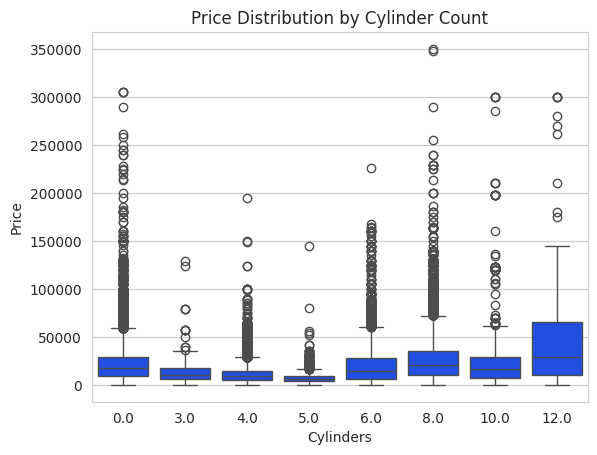

In [ ]:
# visualizations of cylineders
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.boxplot(x='cylinders_clean', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Cylinder Count")
plt.xlabel("Cylinders")
plt.ylabel("Price")
# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_cylinders.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# zero cyliners do not make sense, check to verify we don't have a case like that
df_cars_clean_corrected[
    (df_cars_clean_corrected['cylinders_clean'] == 0) &
    (df_cars_clean_corrected['cylinders_unknown_flag'] == 0)
].shape[0]

0

In [ ]:
# Median price by cylinders_clean
df_cars_clean_corrected.groupby('cylinders_clean')['price'].median().sort_values()


,price
cylinders_clean,
5.0,6495.0
4.0,8995.0
3.0,9990.0
6.0,14995.0
10.0,16999.0
0.0,17900.0
8.0,20990.0
12.0,29250.0


In [ ]:
# let's now analyze drive
df_cars_clean_corrected['drive'].value_counts(normalize=True) * 100

,proportion
drive,
Unknown,30.669410
4wd,29.918616
fwd,25.418332
rwd,13.993642


In [ ]:
# One-Hot encoding for drive because in this case categories do not have a meaningful order
# One-Hot Encode drive with numeric 0/1 values
drive_dummies = pd.get_dummies(
    df_cars_clean_corrected['drive'],
    prefix='drive',
    dtype=int
)

# Add the dummy columns to the dataset
df_cars_clean_corrected = pd.concat([df_cars_clean_corrected, drive_dummies], axis=1)

# Inspect results
df_cars_clean_corrected.head()



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,state,model_norm,manufacturer_category,condition_numeric,cylinders_clean,cylinders_unknown_flag,drive_4wd,drive_Unknown,drive_fwd,drive_rwd
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,al,sierra 1500 crew cab slt,1,3,8.0,0,0,1,0,0
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,al,silverado 1500,0,3,8.0,0,0,1,0,0
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,al,silverado 1500 crew,0,3,8.0,0,0,1,0,0
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,al,tundra double cab sr,0,3,8.0,0,0,1,0,0
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,al,f-150 xlt,0,4,6.0,0,0,0,0,1


In [ ]:
#df_cars_clean_corrected = df_cars_clean_corrected.drop(
#    columns=['drive_4wd', 'drive_fwd', 'drive_rwd', 'drive_unknown']
#)
# Inspect results
#df_cars_clean_corrected.head()

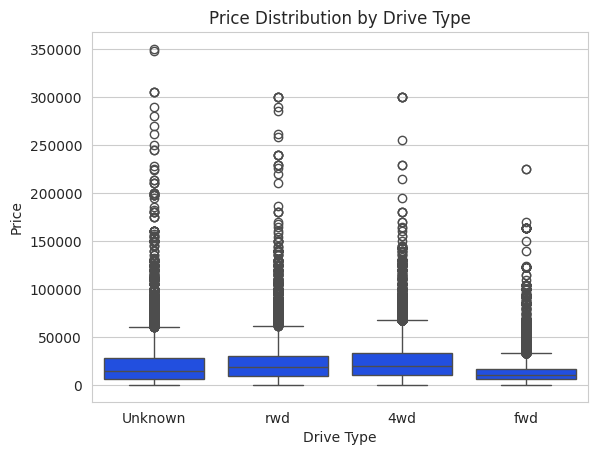

In [ ]:
# compare drive types vs. price
sns.boxplot(x='drive', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Drive Type")
plt.xlabel("Drive Type")
plt.ylabel("Price")
# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_drive_type.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# let's do fuel now
df_cars_clean_corrected['fuel'].unique()
df_cars_clean_corrected['fuel'].value_counts(normalize=True, dropna=False) * 100


,proportion
fuel,
gas,84.395025
other,7.292153
diesel,5.996069
hybrid,1.277617
Unknown,0.612032
electric,0.427104


In [ ]:
# We use on-hot encoding for fuel, as there is not a natural order and universally agreed-upon raking
fuel_dummies = pd.get_dummies(df_cars_clean_corrected['fuel'], prefix='fuel', dtype=int)
df_cars_clean_corrected = pd.concat([df_cars_clean_corrected, fuel_dummies], axis=1)
# Inspect results
df_cars_clean_corrected.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive_4wd,drive_Unknown,drive_fwd,drive_rwd,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,0,1,0,0,0,0,0,1,0,0
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,0,1,0,0,0,0,0,1,0,0
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,0,1,0,0,0,0,0,1,0,0
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,0,1,0,0,0,0,0,1,0,0
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,0,0,0,1,0,0,0,1,0,0


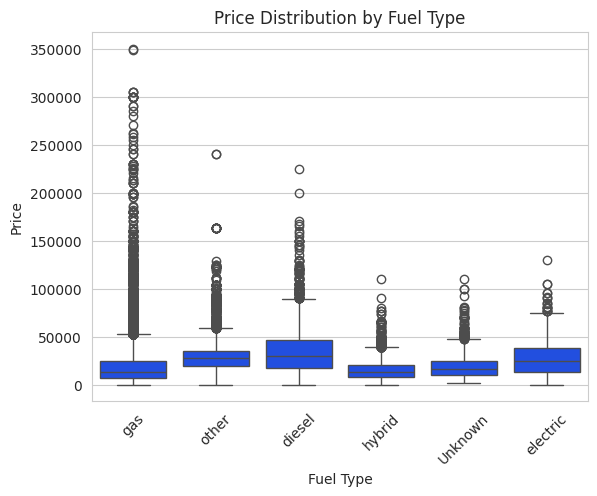

In [ ]:
# visualize fuel vs. price
sns.boxplot(x='fuel', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=45)

# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_fuel_type.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# let's analyze now title_status
df_cars_clean_corrected['title_status'].value_counts(normalize=True, dropna=False) * 100


,proportion
title_status,
clean,94.676111
Unknown,1.938718
rebuilt,1.801802
salvage,0.981626
lien,0.357458
missing,0.197591
parts only,0.046694


In [ ]:
# clean and encode title_status. In this case there is a meaningful progression of quality and legal valuefrom unkown to clean
df_cars_clean_corrected['title_status_clean'] = \
    df_cars_clean_corrected['title_status'].str.lower().str.strip().fillna('unknown')
# ordinal numeric mapping (based on quality ordering)
title_map = {
    'unknown': 0,
    'missing': 1,
    'parts only': 1,
    'salvage': 2,
    'rebuilt': 3,
    'lien': 4,
    'clean': 5
}

df_cars_clean_corrected['title_numeric'] = \
    df_cars_clean_corrected['title_status_clean'].map(title_map)
# verify
df_cars_clean_corrected[['title_status_clean', 'title_numeric']].head()


,title_status_clean,title_numeric
0,clean,5
1,clean,5
2,clean,5
3,clean,5
4,clean,5


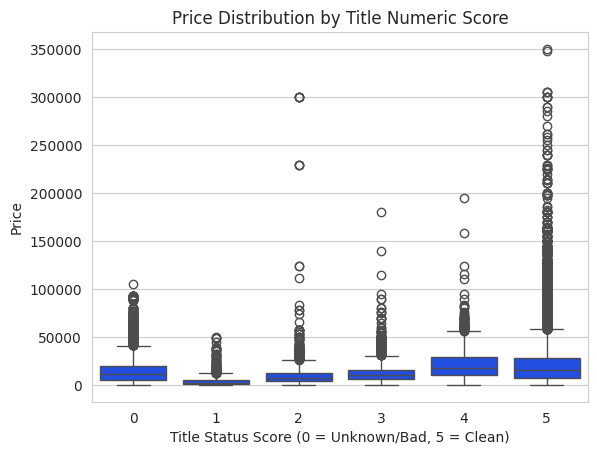

In [ ]:
# Visualize title_status vs. price
sns.boxplot(x='title_numeric', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Title Numeric Score")
plt.xlabel("Title Status Score (0 = Unknown/Bad, 5 = Clean)")
plt.ylabel("Price")
# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_title_numeric.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# let's do transmission now
df_cars_clean_corrected['transmission'].value_counts(normalize=True, dropna=False) * 100


,proportion
transmission,
automatic,77.362721
other,16.122829
manual,6.069935
Unknown,0.444515


In [ ]:
# In this case, we will do one-hot encoding as some manual cars are more expensive and some times are cheaper
# One-Hot Encode transmission into numeric 0/1 columns
transmission_dummies = pd.get_dummies(
    df_cars_clean_corrected['transmission'],
    prefix='transmission',
    dtype=int
)

# Add to dataset
df_cars_clean_corrected = pd.concat([df_cars_clean_corrected, transmission_dummies], axis=1)
# Inspect results
df_cars_clean_corrected.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_numeric,transmission_Unknown,transmission_automatic,transmission_manual,transmission_other
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,0,1,0,0,clean,5,0,0,0,1
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,0,1,0,0,clean,5,0,0,0,1
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,0,1,0,0,clean,5,0,0,0,1
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,0,1,0,0,clean,5,0,0,0,1
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,0,1,0,0,clean,5,0,1,0,0


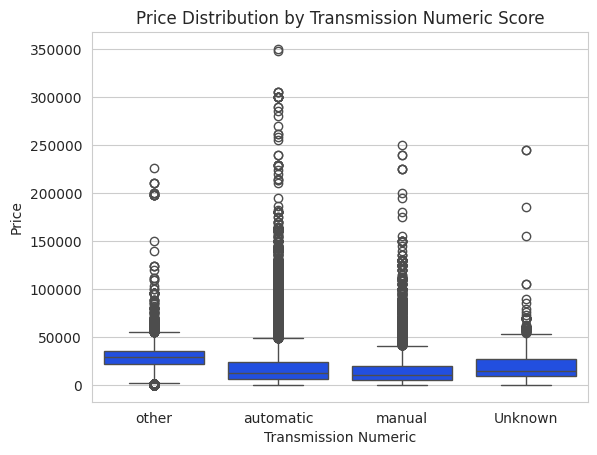

In [ ]:
# visualization of transmission_numeric vs. price
sns.boxplot(x='transmission', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Transmission Numeric Score")
plt.xlabel("Transmission Numeric")
plt.ylabel("Price")

# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_transmission.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# let's do type now
df_cars_clean_corrected['type'].value_counts(normalize=True, dropna=False) * 100


,proportion
type,
Unknown,21.550130
sedan,21.065780
SUV,17.954704
pickup,10.153140
truck,7.247833
other,5.143973
coupe,4.625328
hatchback,4.187408
wagon,2.597708


In [ ]:
# One-Hot Encode original type values for type
type_dummies = pd.get_dummies(
    df_cars_clean_corrected['type'],
    prefix='type',
    dtype=int
)

# Add dummy columns back to dataframe
df_cars_clean_corrected = pd.concat(
    [df_cars_clean_corrected, type_dummies],
    axis=1
)
# Inspect results
df_cars_clean_corrected.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,0,0,0,0,0,1,0,0,0,0
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,0,0,0,0,0,1,0,0,0,0
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,0,0,0,0,0,1,0,0,0,0
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,0,0,0,0,0,1,0,0,0,0
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# inspect file
df_cars_clean_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379065 entries, 0 to 392739
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      379065 non-null  int64  
 1   region                  379065 non-null  object 
 2   price                   379065 non-null  int64  
 3   year                    379065 non-null  float64
 4   manufacturer            379065 non-null  object 
 5   model                   379065 non-null  object 
 6   condition               379065 non-null  object 
 7   cylinders               379065 non-null  object 
 8   fuel                    379065 non-null  object 
 9   odometer                379065 non-null  float64
 10  title_status            379065 non-null  object 
 11  transmission            379065 non-null  object 
 12  drive                   379065 non-null  object 
 13  type                    379065 non-null  object 
 14  paint_color             3

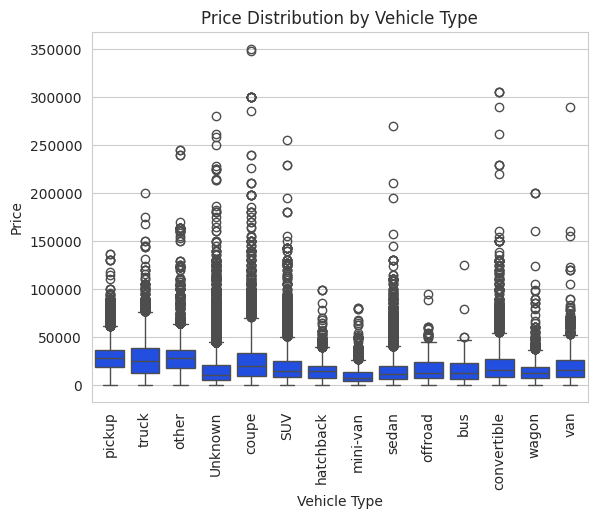

In [ ]:
# boxplot type vs. price
sns.boxplot(x='type', y='price', data=df_cars_clean_corrected)
plt.title("Price Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Price")
plt.xticks(rotation=90)

# ---- SAVE IMAGE ----
plt.savefig("boxplot_price_by_vehicle_type.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# let's analyze paint now
df_cars_clean_corrected['paint_color'].value_counts(normalize=True, dropna=False) * 100


,proportion
paint_color,
Unknown,29.478585
white,18.455146
black,14.934378
silver,10.282669
blue,7.555169
red,7.337528
grey,5.809558
green,1.799955
custom,1.608167


In [ ]:
# One-hot encoding because paint_color is a categorical value without a natural order
# One-Hot Encode original paint_color values
paint_dummies = pd.get_dummies(
    df_cars_clean_corrected['paint_color'],
    prefix='paint',
    dtype=int
)

# Add dummy columns to dataframe
df_cars_clean_corrected = pd.concat(
    [df_cars_clean_corrected, paint_dummies],
    axis=1
)
# Inspect results
df_cars_clean_corrected.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,paint_brown,paint_custom,paint_green,paint_grey,paint_orange,paint_purple,paint_red,paint_silver,paint_white,paint_yellow
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,0,0,0,0,0,0,0,0,1,0
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,0,0,0,0,0,0,0,0,0,0
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,0,0,0,0,0,0,1,0,0,0
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,0,0,0,0,0,0,1,0,0,0
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# let's analyze state
df_cars_clean_corrected['state'].value_counts(normalize=True, dropna=False) * 100

,proportion
state,
ca,11.612784
fl,6.948413
tx,5.298036
ny,4.606862
oh,4.244391
mi,4.162347
or,3.603604
pa,3.313152
nc,3.268833


In [ ]:
# To reduce dimensionality we group states by region and then we do one-hot encoding with the regions
region_map = {
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','CT':'Northeast','RI':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',
    'DE':'Mid-Atlantic','MD':'Mid-Atlantic','DC':'Mid-Atlantic','VA':'Mid-Atlantic','NC':'Mid-Atlantic','SC':'Mid-Atlantic','GA':'Mid-Atlantic','FL':'Mid-Atlantic',
    'MI':'Midwest','OH':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest','MN':'Midwest','IA':'Midwest','MO':'Midwest','KS':'Midwest','NE':'Midwest','SD':'Midwest','ND':'Midwest',
    'TX':'South','OK':'South','AR':'South','LA':'South','TN':'South','KY':'South','AL':'South','MS':'South',
    'CO':'West','UT':'West','NV':'West','AZ':'West','NM':'West','WY':'West','MT':'West','ID':'West',
    'CA':'Pacific','OR':'Pacific','WA':'Pacific','AK':'Pacific','HI':'Pacific'
}
# convert to uppercase so it matches the mapping keys
df_cars_clean_corrected['state'] = df_cars_clean_corrected['state'].str.upper()
# create the new column
df_cars_clean_corrected['region_state'] = df_cars_clean_corrected['state'].map(region_map).fillna('Unknown')
# Encoding region_state with One-Hot
region_state_dummies = pd.get_dummies(
    df_cars_clean_corrected['region_state'],
    prefix='region',
    dtype=int
)

df_cars_clean_corrected = pd.concat(
    [df_cars_clean_corrected, region_state_dummies],
    axis=1
)
# Inspect results
df_cars_clean_corrected.info()



<class 'pandas.core.frame.DataFrame'>
Index: 379065 entries, 0 to 392739
Data columns (total 72 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      379065 non-null  int64  
 1   region                  379065 non-null  object 
 2   price                   379065 non-null  int64  
 3   year                    379065 non-null  float64
 4   manufacturer            379065 non-null  object 
 5   model                   379065 non-null  object 
 6   condition               379065 non-null  object 
 7   cylinders               379065 non-null  object 
 8   fuel                    379065 non-null  object 
 9   odometer                379065 non-null  float64
 10  title_status            379065 non-null  object 
 11  transmission            379065 non-null  object 
 12  drive                   379065 non-null  object 
 13  type                    379065 non-null  object 
 14  paint_color             3

---

## **Data Preparation for Modelling**

In this section, we prepare the dataset for regression modeling by ensuring that only appropriate and meaningful features are included. This involves selecting the **target variable** (`price`) and retaining only **numerical predictors** that can be used directly in modeling. During this process, we remove identifier fields such as `id`, which do not provide predictive value and could introduce noise or overfitting. The final prepared dataset (`df_cars_reg`) includes only numerical features and the target variable, optimized for regression analysis and performance evaluation.

---


In [ ]:
# Create a file with just the target variable and numerical variables
# Select numeric columns
numeric_cols = df_cars_clean_corrected.select_dtypes(include='number').columns

# Drop unneeded identifying columns like id
numeric_cols = [col for col in numeric_cols if col not in ['id']]

# Create regression dataset with price + numeric features
df_cars_reg = df_cars_clean_corrected[['price'] + [col for col in numeric_cols if col != 'price']]

# Inspect results
df_cars_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379065 entries, 0 to 392739
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   379065 non-null  int64  
 1   year                    379065 non-null  float64
 2   odometer                379065 non-null  float64
 3   manufacturer_category   379065 non-null  int64  
 4   condition_numeric       379065 non-null  int64  
 5   cylinders_clean         379065 non-null  float64
 6   cylinders_unknown_flag  379065 non-null  int64  
 7   drive_4wd               379065 non-null  int64  
 8   drive_Unknown           379065 non-null  int64  
 9   drive_fwd               379065 non-null  int64  
 10  drive_rwd               379065 non-null  int64  
 11  fuel_Unknown            379065 non-null  int64  
 12  fuel_diesel             379065 non-null  int64  
 13  fuel_electric           379065 non-null  int64  
 14  fuel_gas                3

---

## **Train-Test Split**

In this step, we split the prepared dataset into training and testing sets to evaluate model performance on unseen data. The training set is used to fit the regression model, while the testing set allows us to measure how well the model generalizes. We use an 80/20 split, which is a standard starting point for most regression problems.
---
These files X and y are the inputs for the other jupiter notebook that is centered in modeling.

In [ ]:
# Split data into training and testing sets
X = df_cars_reg.drop(columns=['price'])
y = df_cars_reg['price']

In [ ]:
# save X and y to continue in a different notebook for modeling
import os
os.getcwd()
# Save X and y inside /content
X.to_csv("/content/X.csv", index=False)
y.to_csv("/content/y.csv", index=False)
# download to your local desktop
from google.colab import files
files.download("/content/X.csv")
files.download("/content/y.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>